In [1]:
import scanpy as sc

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

In [2]:
adata = sc.read("/home/spuccio/isilon/spuccio/SP028_Autoimmunity/h5_files/integrated_second_3_CD8_id.h5ad")

In [3]:
Mela = sc.read("/mnt/lugli/spuccio/SP028_Autoimmunity/h5_files/Mela.h5ad",cache=True)

In [6]:
Metadata_Mela = pd.read_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/dataset/Melanoma_RNA_sequencing_result/Metadata_parsed.csv",header=0)
Metadata_Mela['disease'] = "Skin_Mela"
Mela.obs['CellId'] = Metadata_Mela["Cell"].to_list()
Mela.obs['CellFromTumor'] = Metadata_Mela["CellFromTumor"].to_list()
Mela.obs['PatientNumber'] = Metadata_Mela["PatientNumber"].to_list()
Mela.obs['TumorType'] = Metadata_Mela["disease"].to_list()
Mela.obs['TumorSite'] = Metadata_Mela["TumorSite"].to_list()
Mela.obs['CellType'] = Metadata_Mela["CellType"].to_list()
Mela.obs['Subtype'] = Metadata_Mela["Subtype"].to_list()

In [7]:
adata = adata[adata.obs['TumorSite'] == 'Skin_Mela',:]

/home/spuccio/miniconda3/envs/desc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [8]:
Mela = Mela[adata.obs_names,:]

In [9]:
Mela = Mela[:,adata.var_names]

In [10]:
Mela.obs = adata.obs

In [11]:
adata.X = Mela.X

In [12]:
adata.raw = adata

In [13]:
adata =adata[adata.obs['desc_0.6'].isin([1, 3,4,5,6,7,9,11,12,13,14,15,16,17]),:]

In [ ]:
#sc.tl.rank_genes_groups(Mela, 'desc_0.6', method='wilcoxon',use_raw=True,pts=False)
#pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

In [39]:
marker_genes = dict()
marker_genes["CD8 T Effector Memory"]  = ['HSPA1A', 'HSPA1B', 'HSPH1', 'ANXA1', 'HSPA8', 'MTRNR2L12', 'IL7R', 'TC2N', 'RPS27', 'GZMM', 'HLA-C', 'RPL41', 'SAMD3', 'DNAJB1', 'GZMH', 'ZFP36L2', 'HSP90AA1', 'MTRNR2L8', 'RPS21', 'RPS29', 'HSPA6', 'SPOCK2', 'PARP8', 'MT-ATP8', 'XCL2', 'CAMK4', 'CACYBP', 'STK17A', 'HSPE1', 'P2RY8', 'RGCC', 'FYN', 'RPS15A', 'TUBA4A', 'HSPD1', 'PTPRCAP', 'DUSP2', 'AIM1', 'STAT4', 'FAM102A', 'SUN2', 'SH2D1A', 'HSP90AB1', 'MATK', 'CHORDC1', 'RPL26', 'SCML4', 'CXCR4', 'NELL2', 'RASAL3', 'CALM1', 'AC090498.1', 'HLA-B', 'CCR7', 'S1PR4', 'KLRG1', 'DNAJA1', 'AHNAK', 'CD52', 'GZMK', 'RNF125', 'SARAF', 'TXNIP', 'RPL36A', 'PLP2', 'HIST1H4C', 'CD69', 'SELPLG', 'ZFAND2A', 'IFITM1', 'LYAR', 'CD3E', 'PTPRC', 'AHSA1', 'ARHGEF1', 'BTG1', 'DUSP1', 'KLF2', 'OASL', 'UBC', 'TSC22D3', 'PLK3', 'CRTAM', 'CD5', 'TAGAP', 'RPS25', 'CD6', 'FKBP4', 'BIN2', 'JMJD6', 'RPL23A', 'TNFSF9', 'CNN2', 'CD48', 'RPL35A', 'RPL28', 'BAG3', 'CXCR3', 'ALOX5AP', 'RPL37', 'ARHGDIB', 'RPS12', 'CTSW', 'DOK2', 'COTL1', 'PCBP1', 'CYTIP', 'RPL30', 'MBP', 'CCND3', 'SEMA4D', 'LIME1', 'GZMA', 'LCP1', 'RPS28', 'ITK', 'CCNH', 'IL21R', 'DEDD2', 'HCST', 'RPL34', 'CDC42EP3', 'CD96', 'SLC7A5', 'ISG20', 'RPS3', 'TTC39C', 'SLBP', 'TCP1', 'RPS4Y1', 'TSPYL2', 'PPP1R2', 'ZC3HAV1', 'SMCHD1', 'F2R', 'GIMAP7', 'RASA3', 'EZR', 'GNG2', 'MYADM', 'RHOF', 'S100A10', 'CRIP1', 'SLC2A3', 'RPS27A', 'RPL17', 'SKAP1', 'PITPNC1', 'LEPROTL1', 'FAM177A1', 'SLC9A3R1', 'IL32', 'PRKCH', 'ZAP70', 'ACAP1', 'RPL39', 'RAC2', 'STOM', 'THEMIS', 'HSPA5', 'EMB', 'RALGAPA1', 'IL2RG', 'CD8B', 'SRSF2', 'PTGER4', 'AOAH', 'DNAJB6', 'SRSF7', 'PIK3R1', 'CSRNP1', 'TES', 'LDHA', 'IL2RB', 'PBXIP1', 'C12orf75', 'TGFB1', 'EML4', 'FCMR', 'RARA', 'RPL38', 'KIAA1551', 'CD37', 'ARHGEF3', 'FKBP5', 'MYH9', 'KLF3', 'CITED2', 'PDCL3', 'IKZF1', 'CD3G', 'PPP2R5C', 'TUBA1A', 'H2AFX', 'TMEM2', 'RPLP2', 'RPL36', 'SYNE1', 'AKNA', 'ADGRE5', 'FLNA', 'RBM39', 'MSN', 'NOP58', 'HERPUD2', 'TRAT1', 'FAU', 'SOCS1da', 'SYNE2', 'STIP1', 'UBB', 'PIK3IP1', 'MRPL18', 'SEPT1', 'TAGLN2', 'TNFAIP8', 'PDCD4', 'HNRNPUL1', 'ETS1', 'RORA', 'DDX5', 'DDIT4', 'IL16', 'GABARAPL1', 'CDK17', 'SAP18', 'SF3A1', 'PTGES3', 'SRRT', 'CORO1A', 'FOXP1', 'CAPN2', 'SC5D', 'OCIAD2', 'FXYD5', 'DNTTIP2', 'HMHA1', 'TUBB4B', 'PNP', 'IFNG', 'MAPRE2', 'NBEAL1', 'CYFIP2', 'MT-ND1', 'MT-ND4L', 'RHOH', 'LTB', 'ARAP2', 'MT-ND4', 'ATF7IP', 'S100A4', 'NFATC2', 'MAT2A', 'KLRB1', 'DDX24', 'CDC42SE2', 'RBL2', 'ZFP36', 'APBB1IP', 'TRMT10C', 'FLT3LG', 'SLC38A1', 'CDC42SE1', 'PGK1', 'CD53', 'ARHGAP15', 'RNF213', 'TAPBP', 'YWHAZ', 'IDI1', 'SON', 'TMA7', 'CCT4', 'MECP2', 'STK17B', 'CD44', 'SEPT6', 'NUCB2', 'AES', 'LINC-PINT', 'JAK1', 'ARID5A', 'YWHAB', 'PDE3B', 'IDS', 'PRKACB', 'PSME1', 'FAM129A', 'PLIN2', 'GBP5', 'STK4', 'SP100', 'PNPLA2', 'CCT2', 'PDE4B', 'SLC1A5', 'MCL1', 'JUNB', 'ZC3H12A', 'ELOVL5', 'LRRFIP1', 'IFRD1', 'SAMSN1', 'TAF7', 'NUP98', 'YPEL5', 'CCL4', 'IFNGR1', 'VPS37B', 'TGFBR2', 'PHF20', 'HSPA4', 'NUDC', 'RNF149', 'ODC1', 'CLK1', 'ANKRD12', 'CLDND1', 'TNF', 'JUN', 'CSNK1D', 'PIM1', 'MT2A', 'KLF6', 'TNFAIP3', 'SFPQ', 'IL10RA', 'USP36', 'PER1', 'STARD7', 'ITGB1', 'RP11-290D2.6', 'MT1X', 'NEU1', 'ATP1B3', 'HSPB1', 'LMNA', 'NR4A1']
marker_genes["CD8 T Resident Memory"] = ['CXCL13', 'ETV1', 'PCAT29', 'KLRD1', 'XCL2', 'CRTAM', 'TNFRSF9', 'CTLA4', 'XCL1', 'LYST', 'DUSP2', 'TMEM2', 'CD8A', 'TIGIT', 'CD7', 'CD8B', 'PTPN22', 'AKAP5', 'NKG7', 'COTL1', 'ITM2A', 'RPS15A', 'CCL5', 'RNF19A', 'CNOT6L', 'HCST', 'DUSP4', 'CBLB', 'SLA', 'HOPX', 'TOX', 'PDCD1', 'CST7', 'CTSW', 'RPL28', 'RPS27', 'PTPRC', 'RAB27A', 'CD3D', 'TRAT1', 'FYN', 'PRKCH', 'CD27', 'CLEC2D', 'CD3E', 'IL32', 'ICOS', 'GZMA', 'CCL4', 'GFOD1', 'BTG1', 'NR3C1', 'ZFP36L2', 'CD96', 'PDE7A', 'CREM', 'ATP8A1', 'SH2D1A', 'LEPROTL1', 'MT-ND3', 'ISG20', 'FABP5', 'TRBC2', 'GEM', 'RGCC', 'HNRNPLL', 'PCED1B', 'RPLP1', 'SARAF', 'RPL12', 'NAB1', 'ARAP2', 'FAU', 'ALOX5AP', 'LAG3', 'TNFRSF1B', 'FAM177A1', 'RPL37', 'CD52', 'ITGA4', 'SIRPG', 'TRBC1', 'RPS24', 'SNX9', 'RPS15', 'RPL39', 'RPS21', 'SRGN', 'TUBA4A', 'SH3BGRL3', 'HMGB2', 'PTMS', 'ITGAE', 'ASXL2', 'RGS2', 'LIMD2', 'ITK', 'RPL35A', 'HLA-C', 'PYHIN1', 'WIPF1', 'SLA2', 'BCL11B', 'ETS1', 'SH2D2A', 'RPL18', 'RPL41', 'PPP1R2', 'MT-CO2', 'RPS28', 'IKZF3', 'VCAM1', 'SLC7A5', 'C12orf57', 'HAVCR2', 'SYTL3', 'RARRES3', 'NR4A2', 'TMA7', 'CXCR6', 'CCSER2', 'IFI16', 'SRRT', 'CD2', 'RPL26', 'SOD1', 'SNAP47', 'CLEC2B', 'CD99', 'ZEB2', 'EVL', 'PNRC1', 'CD3G', 'RPS2', 'RAC2', 'LBH', 'LINC00152', 'HSPE1', 'NUCB2', 'ELF1', 'IL2RG', 'PTPRCAP', 'C9orf16', 'SH3KBP1', 'UBE2B', 'STK4', 'PARK7', 'ADGRE5', 'RPL24', 'WHSC1L1', 'SEPT7', 'SRSF7', 'MAPRE2', 'COMMD6', 'EZR', 'RHBDD2', 'PPP1R16B', 'NIN', 'YPEL5', 'PCBP1', 'CDKN1B', 'LSP1', 'NFATC2', 'STAT3', 'RASAL3', 'LCK', 'SEMA4D', 'VPS37B', 'EMD', 'CD69', 'PPP2R5C', 'FAM3C', 'STK17B', 'MBNL1', 'ENTPD1', 'SIT1', 'GABARAPL1', 'CXCR4', 'ARID4B', 'PIK3IP1', 'CYTIP', 'CHIC2', 'STK17A', 'PARP8', 'GNG2', 'ATP5L', 'SRSF2', 'SNRPD2', 'RBM39', 'JMJD6', 'SUB1', 'PNISR', 'ATPIF1', 'CYCS', 'CRIP1', 'SLC38A1', 'FCMR', 'KIAA1551', 'RGS1', 'SKAP1', 'TERF2IP', 'NAP1L4', 'PSME1', 'TOMM5', 'C5orf56', 'PMAIP1', 'TSPYL2', 'SP140', 'RUNX3', 'IL21R', 'CNIH1', 'BUB3', 'ATXN1', 'RHOH', 'HLA-F', 'USP11', 'ARHGAP9', 'GSPT1', 'PTPN7', 'SHFM1', 'PPM1G', 'CCND2', 'GBP2', 'RALGAPA1', 'ISG15', 'CHST12', 'ARF6', 'SEPT1', 'PIK3R1', 'TBRG1', 'MAZ', 'EPC1', 'PTP4A1', 'LINC-PINT', 'SPN', 'NAA50', 'IFI27L2', 'FKBP5', 'ZBTB1', 'ITGB1', 'RNF125', 'AKAP13', 'JAK1', 'RELB', 'GPBP1', 'HBP1', 'STARD7', 'CELF2', 'GNAS', 'CDC42SE2', 'ATP5D', 'MT2A', 'SMG1', 'ODC1', 'HSPH1', 'CHORDC1', 'MAT2B', 'IDI1', 'CDK2AP2', 'SUN2', 'GGA2', 'C9orf142', 'OGT', 'RSRP1', 'SAMSN1', 'SON', 'KPNA2', 'DHX36', 'NBEAL1', 'CHD1', 'TSTD1', 'TANK', 'ATRX', 'RPL22L1', 'SCAND1', 'DNAJB1', 'EVI2A', 'BTG3', 'RBPJ', 'ARGLU1', 'KLRB1', 'NOP58', 'CNN2', 'PPP1R12A', 'KMT2E', 'PPP4R2', 'HSPD1', 'CD38', 'SCAF11', 'ATP1B3', 'ISCA1', 'REL', 'CLK1', 'GLUD1', 'GPCPD1', 'GZMM', 'N4BP2L2', 'AHSA1', 'PIM3', 'CACYBP']
marker_genes["CD8 gamma delta t cells"]  = ['KLRD1', 'GZMH', 'AC092580.4', 'XCL2', 'ZFP36L2', 'GZMB', 'IL7R', 'STAT4', 'GZMM', 'RNF125', 'PARP8', 'FAM177A1', 'BTG1', 'DUSP2', 'RPS27', 'AIM1', 'ANXA1', 'FYN', 'SPOCK2', 'SLC7A5', 'MATK', 'HLA-C', 'CXCR4', 'RPL41', 'TUBA4A', 'GNG2', 'XCL1', 'GABARAPL1', 'IFITM1', 'ALOX5AP', 'SATB1', 'RGCC', 'ISG20', 'PIK3R1', 'RORA', 'SYTL3', 'TGFB1', 'MYADM', 'LEPROTL1', 'TC2N', 'SARAF', 'RPL28', 'RPS29', 'SRSF2', 'P2RY8', 'FKBP5', 'CTSW', 'PBX4', 'AOAH', 'PTPRC', 'CAMK4', 'RPS15A', 'IL21R', 'CD52', 'RPS21', 'RPS12', 'S100A4', 'ARHGDIB', 'CD69', 'HLA-B', 'RARA', 'IL32', 'EZR', 'CD7', 'CD96', 'HNRNPUL1', 'CNOT6L', 'CALM1', 'TSC22D3', 'RALGAPA1', 'KLRB1', 'RPS27A', 'SCML4', 'EML4', 'ZFP36', 'SOCS1', 'HCST', 'DDIT4', 'PPP1R16B', 'SRGN', 'PITPNC1', 'LDHA', 'HOPX', 'GPR171', 'KLRG1', 'RPS25', 'IFNGR1', 'REL', 'RPL39', 'PDCD4', 'RPL35A', 'SLC2A3', 'RPL32', 'STK17A', 'ADGRE5', 'S1PR4', 'RPS14', 'PTGER4', 'LCP1', 'OASL', 'CCNH', 'YWHAZ', 'S100A10', 'PRF1', 'RPL23A', 'RASA3', 'SH2D2A', 'AKNA', 'FLNA', 'TAGLN2', 'RUNX3', 'MT-ATP8', 'CCL4', 'SYAP1', 'RPS28', 'GZMA', 'RPL26', 'FAM102A', 'ABLIM1', 'CD3E', 'RPL34', 'PTMA', 'MCL1', 'SELPLG', 'KMT2E', 'ETS1', 'GPR65', 'PTPN22', 'RPLP2', 'PDE4B', 'VPS37B', 'FAM129A', 'SRSF7', 'RPL36A', 'RPL30', 'AHNAK', 'CDC42SE2', 'PNRC1', 'TTC39C', 'SLC10A3', 'HERPUD2', 'RPL37', 'RPS3', 'EMB', 'SLA', 'GLIPR1', 'USP36', 'CXCR6', 'BZW1', 'SMCHD1', 'AKAP13', 'EMD', 'SFPQ', 'MT-ND3', 'LYAR', 'RNF149', 'HLA-A', 'LRRFIP1', 'YPEL5', 'S100A6', 'HSPA8', 'PLP2', 'RPL36AL', 'MBP', 'FAM46C', 'DDX24', 'CXCR3', 'TRBC2', 'SEMA4D', 'IFITM2', 'TMEM2', 'PCBP1', 'IL2RG', 'TRBC1', 'CRIP1', 'MYH9', 'CRTAM', 'G3BP2', 'HSPA5', 'MECP2', 'CDK17', 'PPP2R5C', 'NUP98', 'HIST1H4C', 'GUK1', 'JMJD6', 'CD8A', 'ELOVL5', 'ARF6', 'CD6', 'TNFAIP3', 'RPL36', 'SLC38A1', 'ARID5A', 'PIK3IP1', 'ARHGAP9', 'GYG1', 'AC090498.1', 'HSPH1', 'FAU', 'RPL38', 'RNF138', 'MTRNR2L12', 'ST3GAL1', 'C12orf75', 'ADSS', 'SKIL', 'PER1', 'FBXO34', 'PLK3', 'GSPT1', 'HSPE1', 'CREM', 'PLEKHA2', 'PDCL3', 'IKZF1', 'TSEN54', 'CD5', 'GPBP1', 'ATP8A1', 'PHF20', 'TNFRSF1B', 'CCND3', 'DIAPH1', 'HSPD1', 'CEBPZ', 'IDS', 'PRKCH', 'SUN2', 'DUSP1', 'CYTIP', 'GPR132', 'PRKX', 'STOM', 'CD55', 'NDUFS5', 'CYTH1', 'PPP2CA', 'TRAT1', 'PFKFB3', 'PTP4A1', 'IQGAP2', 'CSNK1D', 'ELL2', 'YIPF5', 'DHX36', 'FNBP1', 'BIN2', 'RPL17', 'PBXIP1', 'SLBP', 'DNAJB6', 'RBMS1', 'TUBB2A', 'RHOF', 'CITED2', 'KLF3', 'FOSL2', 'STK4', 'PPP1CB', 'MAZ', 'ARAP2', 'C9orf78', 'HNRNPA0', 'CD44', 'RASSF5', 'JAK1', 'IDI1', 'NR4A3', 'SH2D1A', 'ZC3HAV1', 'LMNA', 'CDC42SE1', 'PRNP', 'ACTN4', 'PDE3B', 'RASAL3', 'CAST', 'ATP1A1', 'STARD7', 'CSRNP1', 'MSN', 'SLC16A3', 'BCAS2', 'MT2A', 'WIPF1', 'RANBP2', 'RHOH', 'SURF4', 'BCL11B', 'MAT2A', 'TERF2IP', 'RAP1B', 'SRRM1', 'LIME1', 'CAPN2', 'MTRNR2L8', 'EVI2A', 'ACAP1', 'CD48', 'RBM39', 'LITAF', 'VIM', 'AREG', 'TMA7', 'TES', 'UBC', 'ID2', 'BRD2', 'SLA2', 'AES', 'SC5D', 'ITK', 'CD53', 'PPP1R2', 'CHD1', 'MAP1LC3B', 'PGK1', 'NCL', 'BHLHE40', 'ATF7IP', 'SELK', 'SERPINB9', 'PHF1', 'ICAM3', 'CELF2', 'PRKAR2A', 'HSP90AA1', 'BAZ1A', 'CCSER2', 'SCAF11', 'DOK2', 'ATP1B3', 'SEC62', 'UPP1', 'BIRC2', 'NBEAL1', 'CLEC2B', 'CNOT2', 'ZC3H12A', 'TUBB4B', 'NFKB1', 'SETD2', 'HSPA1A', 'JUND', 'KDM6B', 'MGAT4A', 'KIAA1551', 'PIM1', 'ERN1', 'TSPYL2', 'SNHG15', 'RP5-1171I10.5', 'RELB', 'TAGAP']
marker_genes["Cytotoxic CD8"] = ['TRBV15', 'NKG7', 'TRAV19', 'CCL5', 'CST7', 'CD8A', 'GZMK', 'VCAM1', 'CD27', 'TRAV26-1', 'CMC1', 'CD8B', 'LAG3', 'DUSP4', 'CD3D', 'PRF1', 'GZMA', 'TNFRSF9', 'CD2', 'TRAC', 'LYST', 'CTSW', 'RGS1', 'DENND2D', 'SNAP47', 'CD3G', 'CD3E', 'CD7', 'ADGRG1', 'ZNF331', 'HLA-A', 'TOX', 'ITM2A', 'LCK', 'LIMD2', 'CREM', 'PSMB9', 'HLA-E', 'HLA-B', 'B2M', 'IL32', 'RNF19A', 'NR4A2', 'CORO1A', 'LITAF', 'MALAT1', 'SIT1', 'HAVCR2', 'SIRPG', 'APOBEC3G', 'CXCR4', 'LBH', 'IL2RG', 'TRBC2', 'PARK7', 'EVL', 'CHST12', 'UBC', 'IRF1', 'SH2D2A', 'H3F3B', 'ITGA4', 'DDX5', 'GATA3', 'PTPN6', 'PRKCH', 'PDCD1', 'TERF2IP', 'TNFRSF1B', 'RARRES3', 'PTPN7', 'MTRNR2L8', 'APOBEC3C', 'CCNI', 'HNRNPA1', 'RPS4Y1', 'SYTL3', 'RUNX3', 'APMAP', 'SLA', 'CBLB', 'HNRNPLL', 'TUBA4A', 'TNFAIP3', 'SUB1', 'SLA2', 'SPN', 'PSTPIP1', 'PRDM1', 'SLC38A1', 'PTPRC', 'RGS2', 'SRSF7', 'LY6E', 'LSP1', 'SRSF5', 'TAP1', 'LAT', 'PSMB8', 'TIGIT', 'CD247', 'SEPT7', 'CD82', 'ENTPD1', 'RAC2', 'SRRT', 'SUMO2', 'STAT3', 'RAB27A', 'CLEC2D', 'STK17B', 'FAM3C', 'TRAF3IP3', 'MIR155HG', 'CCND2', 'ALDOA', 'PKM', 'CFL1', 'NPM1', 'CLIC1', 'FKBP1A', 'CNBP', 'CALR', 'UBB', 'ARHGAP9', 'CDK2AP2', 'HLA-F', 'SOD1', 'CIRBP', 'ARPC2', 'SYNGR2', 'ZFP36', 'NCL', 'CARHSP1', 'ACTG1', 'EIF5', 'CXCR3', 'ANXA6', 'TRAT1', 'CD2BP2', 'DRAP1', 'HNRNPK', 'LAPTM5', 'HOPX', 'CALM3', 'PSME1', 'PPDPF', 'CD38', 'DDIT4', 'GALM', 'AKNA', 'HMGB1', 'CD99', 'PDIA3', 'SPTAN1', 'PGAM1', 'HNRNPF', 'ARL6IP5', 'ARID4B', 'SEPT1', 'TPI1', 'ATP6V0E1', 'BRD2', 'FYB', 'SRSF2', 'CHCHD2', 'UCP2', 'MYH9', 'TMBIM6', 'PSMA7', 'TBC1D10C', 'PRRC2C', 'KMT2E', 'FUS', 'PEBP1', 'ISCU', 'BST2', 'ACAP1', 'EDF1', 'EID1', 'WIPF1', 'YWHAZ', 'PPP1CA', 'GPR65', 'PSME2', 'CYCS', 'CD37', 'SYNE2', 'C12orf57', 'SKP1', 'ABI3', 'PAG1', 'SH3KBP1', 'JUNB', 'UBE2L6', 'HSPA5', 'YPEL5', 'SLC9A3R1', 'TSPYL2', 'BAX', 'GABARAPL2', 'DAZAP2', 'MSN', 'DDX6', 'RHBDD2', 'GPSM3', 'LCP2', 'HMGN1', 'SPCS1', 'ID2', 'MAP3K8', 'RBM8A', 'CTSC', 'TMEM2', 'PSMB10', 'BUB3', 'VCP', 'RNF167', 'ADGRE5', 'AIP', 'CCDC85B', 'CIB1', 'ICAM3', 'RAB1B', 'CLDND1', 'ZFP36L1', 'TRBC1', 'PRR13', 'SF3B2', 'SKAP1', 'NOP58', 'HNRNPDL', 'RBM3', 'PSMB1', 'SNX9', 'LDHB', 'BHLHE40', 'CCNDBP1', 'TAPBP', 'TPR', 'THRAP3', 'LCP1', 'ZBTB38', 'ARF1', 'ITGB2', 'CLEC2B', 'IDH2', 'NCOR1', 'SRI', 'DDX24', 'SERTAD1', 'BCLAF1', 'TRAPPC1', 'SURF4', 'TRIM22', 'HNRNPA0', 'GIMAP4', 'SRSF3', 'EPC1', 'XRCC6', 'ANAPC16', 'WAS', 'SSR2', 'GBP5', 'PSMB3', 'SEPT9', 'PDIA6', 'EWSR1', 'JTB', 'RASSF5', 'C9orf142', 'G3BP2', 'HNRNPA3', 'PRPF38B', 'STAT1', 'WDR1', 'BTG3', 'CDKN1B', 'PRELID1', 'SON', 'FNBP1', 'IDS', 'CAP1', 'HNRNPR', 'ARHGEF1', 'PHLDA1', 'ELF1', 'ADAR', 'TMEM50A', 'SF3B1', 'UBXN1', 'C20orf24', 'PPP2R1A', 'KIAA1551', 'IDI1', 'GTF2B', 'GBP2', 'CRIP1', 'PNISR', 'SNRPB', 'ARF5', 'SF1', 'RNF213', 'MPHOSPH8', 'ATRX', 'PSMA3', 'TMEM179B', 'PTPN22', 'REEP5', 'SHISA5', 'C11orf58', 'OPTN', 'PSMA5', 'C14orf166', 'RNPS1', 'HSPA9', 'ADRM1', 'PDCD6', 'PPM1G', 'VPS37B', 'SCAMP2', 'MEAF6', 'ANXA11', 'MTDH', 'MAF1', 'M6PR', 'LINC00152', 'IMP3', 'SCAND1', 'PPP1CC', 'IFI16', 'SS18L2', 'SELT', 'AKIRIN1', 'NONO', 'ARGLU1', 'KIF5B', 'AKIRIN2', 'SUMO1', 'CELF2', 'XRCC5', 'PPP4C', 'ROCK1', 'ARL4C', 'HMGN3', 'IL10RA', 'TAX1BP1', 'ENSA', 'PSMD8', 'WHSC1L1', 'UBXN4', 'JAK1', 'MAT2B', 'AP3S1', 'SYF2', 'OTUB1', 'DYNLT1', 'CNPY3', 'HNRNPM', 'PSMB2', 'SIVA1', 'ARID5A', 'RSRP1', 'BCAP31', 'ANP32A', 'EIF4H']
marker_genes["Mitotic CD8 T Cells"] = ['TYMS', 'RRM2', 'MKI67', 'UBE2C', 'CENPF', 'TOP2A', 'CCNA2', 'NUSAP1', 'ASPM', 'TPX2', 'CKS1B', 'CDK1', 'ZWINT', 'ASF1B', 'TK1', 'CENPM', 'UHRF1', 'KIFC1', 'HIST1H1B', 'BIRC5', 'SMC2', 'CDKN3', 'MAD2L1', 'CDC20', 'PKMYT1', 'DHFR', 'CLSPN', 'AURKB', 'KIAA0101', 'CASC5', 'EZH2', 'UBE2T', 'CENPE', 'HMGB3', 'RACGAP1', 'NUF2', 'CENPW', 'CENPU', 'CCNB2', 'CCNB1', 'PLK1', 'CDCA5', 'DLGAP5', 'KIF23', 'CKAP2L', 'CENPN', 'CDCA8', 'GINS2', 'FANCI', 'KIF11', 'TCF19', 'RAD51AP1', 'KIF2C', 'NCAPH', 'TROAP', 'GTSE1', 'DEPDC1B', 'PRC1', 'MCM4', 'KIF15', 'CDCA2', 'NCAPG', 'HMMR', 'CDCA7', 'KIF14', 'CENPH', 'ESCO2', 'BUB1', 'CDCA3', 'NEIL3', 'NCAPG2', 'FAM111B', 'SPC25', 'CDT1', 'CENPA', 'ANLN', 'HJURP', 'CHEK1', 'DIAPH3', 'RAD51', 'FOXM1', 'MELK', 'MND1', 'CEP55', 'CDC6', 'CDC45', 'MYBL2', 'E2F8', 'DTL', 'SGOL1', 'SKA1', 'POC1A', 'PLK4', 'MCM2', 'FBXO5', 'ATAD2', 'FEN1', 'ECT2', 'ARHGAP11A', 'WDR34', 'NDC80', 'CENPK', 'MCM7', 'ORC6', 'SGOL2', 'STMN1', 'SPAG5', 'NCAPD2', 'TIMELESS', 'KIAA1524', 'DTYMK', 'PHF19', 'LIG1', 'PCNA', 'HELLS', 'SMC4', 'TMEM106C', 'FANCD2', 'HIRIP3', 'KIF22', 'HMGB2', 'WDR76', 'ATAD5', 'WHSC1', 'CCDC34', 'TMPO', 'GGH', 'SNRNP25', 'RNASEH2A', 'RFC4', 'AURKA', 'KIF20B', 'RPL39L', 'DNAJC9', 'MCM3', 'LRR1', 'CDCA4', 'SAE1', 'PTTG1', 'RRM1', 'BARD1', 'LMNB1', 'TUBB', 'GMNN', 'INCENP', 'NUDT1', 'WDHD1', 'TTF2', 'HIST1H1D', 'MCM5', 'NRM', 'CHAF1A', 'HMGN2', 'USP1', 'ANP32E', 'NCAPD3', 'RFC5', 'C12orf75', 'DLEU2', 'CCDC28B', 'SMC3', 'RPA3', 'TACC3', 'BRCA2', 'CARHSP1', 'POLA2', 'HMGB1', 'SAC3D1', 'DDX11', 'HIST1H4C', 'HIST1H1E', 'H2AFZ', 'BCL2L12', 'SMC1A', 'YEATS4', 'CDKN2A', 'TUBA1B', 'H2AFX', 'CKAP5', 'DEK', 'TOPBP1', 'FABP5', 'VRK1', 'SKA2', 'SSRP1', 'RBL1', 'PFN1', 'MCM6', 'H2AFV', 'CDC25B', 'FAM111A', 'ANP32B', 'MAD2L2', 'NCAPH2', 'TFDP1', 'RANBP1', 'CTNNAL1', 'DUT', 'DNMT1', 'MTHFD1', 'ACTB', 'LSM4', 'RAD21', 'ACAT2', 'NABP2', 'WDR54', 'GAPDH', 'TUBG1', 'ACOT7', 'CALM3', 'BAZ1B', 'CBX5', 'TEX30', 'CEP78', 'POLD3', 'RNASEH2B', 'DDX39A', 'C19orf48', 'HDAC1', 'CKS2', 'PAFAH1B3', 'SIVA1', 'HAUS1', 'ZDHHC12', 'CDKN2D', 'MIS18BP1', 'CFL1', 'ACTL6A', 'RAD51C', 'ITGB3BP', 'NUCKS1', 'RAN', 'POLR3K', 'RBBP7', 'CKAP2', 'FANCA', 'NUDT21', 'TOX', 'LSM5', 'LBR', 'MZT1', 'IDH2', 'PIN1', 'PSMC3', 'HADH', 'CNTRL', 'HSPB11', 'SFXN1', 'VDAC3', 'EBP', 'PRIM2', 'PPIA', 'TMEM14A', 'GMPS', 'CBX3', 'SIT1', 'BUB3', 'APOBEC3C', 'FDPS', 'LSM2', 'HNRNPR', 'STRA13', 'HN1', 'CORO1A', 'ACTG1', 'RALY', 'CDCA7L', 'HNRNPA2B1', 'HMGN1', 'BANF1', 'PPP1CA', 'PARP1', 'BATF', 'FIBP', 'NUDT5', 'ACYP1', 'DCPS', 'MAGOHB', 'DDB2', 'ARL6IP6', 'PSMB9', 'PTMA', 'SNRPA', 'MPHOSPH9', 'PCNT', 'PGAM1', 'SNRPD1', 'H2AFY', 'CDK2AP2', 'RFC2', 'TPI1', 'SNRPB', 'POP7', 'HAT1', 'CXCL13', 'OXCT1', 'SUPT16H', 'DCTPP1', 'HCFC1', 'ARPC5L', 'VBP1', 'JAKMIP1', 'C1orf35', 'RBBP4', 'HPRT1', 'TRNAU1AP', 'RCC1', 'NUP37', 'ODF2', 'CSE1L', 'MRPS11', 'HINT2', 'PSMB2', 'RBBP8', 'CTPS1', 'MYL6B', 'EXOSC8', 'DCTN3', 'SNRNP40', 'HDGF', 'NUP107', 'KPNA2', 'POLD2', 'RAC2', 'ITM2A', 'NASP', 'KIF2A', 'LSM14A', 'RAB27A', 'RHNO1', 'CEP57', 'TSEN15', 'ITGB1BP1', 'COX8A', 'PA2G4', 'PRDX3', 'SPN', 'PPIH', 'LSM6', 'PAICS', 'TUBB4B', 'PRKDC', 'HP1BP3', 'MRPL37', 'UBE2S', 'C17orf49', 'PKM', 'CCDC167', 'CDKN2C', 'PSIP1', 'NUDT15', 'PPM1G', 'SRP9', 'EXOSC9', 'HNRNPF', 'MAP4K1', 'ARPC2', 'RECQL', 'SRSF10', 'TAF15', 'IFI27L1', 'NUP210', 'PSMD2', 'SNRPA1', 'SCCPDH', 'UCHL5', 'SH2D1A', 'TPGS2', 'POLR2G', 'CYB5B', 'SNRPF', 'TESC', 'ANAPC11', 'PCMT1', 'HIST1H1C', 'NFATC2IP', 'PSTPIP1', 'SUMO2', 'NUP50', 'NONO', 'SLC25A5', 'ANAPC15', 'PDCD5', 'MRPL13', 'TOX2', 'HAUS2', 'PSMB8', 'PRPSAP1', 'HMGXB4', 'NUCB2', 'RUVBL2', 'PSMA4', 'RANGAP1', 'RPIA', 'RSRC1', 'INO80E', 'SSNA1', 'RNPS1', 'PSMD1', 'RFC1', 'TMEM109', 'SUZ12', 'HNRNPA3', 'ILF3', 'TAP1', 'TUBA1C', 'ILF2', 'NAP1L1', 'SNRPE', 'CD3G', 'ARPC5', 'U2AF2', 'THOC3', 'CDK5RAP2', 'DBF4', 'ANXA6', 'HNRNPD', 'LCK', 'CDK2', 'PTBP1', 'SEPT11', 'CCT5', 'CDK4', 'CD8B', 'TPR', 'PSMB3', 'CLIC1', 'IFI16', 'CBX1', 'PDCD1', 'TALDO1', 'IKZF3', 'PTPN7', 'ERH', 'XPO1', 'GALM', 'WDR1', 'TCP1', 'IMMT', 'ACTN4', 'DCXR', 'MEA1', 'HSD17B10', 'FAM96A', 'SF3A2', 'CTLA4', 'UBE2I', 'TIPRL', 'PARK7', 'SNRPC', 'CLN6', 'LAGE3', 'PDS5B', 'PMAIP1', 'RAB1B', 'PSMD7', 'SMARCC1', 'ITGAE', 'ID3', 'SNRPD3', 'MRPL51', 'UFD1L', 'SET', 'CPSF6', 'NELFCD', 'MPC2', 'PDAP1', 'GTF3C6', 'TNFRSF9', 'YWHAQ', 'ETFA', 'LSM3', 'HNRNPAB', 'LAG3', 'COX5A', 'VCAM1', 'MRPL11', 'AATF', 'UBE2N', 'PSMB6', 'NAP1L4', 'APOBEC3G', 'MYL6', 'NUTF2', 'RBM17', 'ROCK1', 'LUC7L2', 'GGCT', 'DENND2D', 'LAT', 'SIRPG', 'ENTPD1', 'PSMD14', 'AP1M1', 'DECR1', 'TIMM10', 'PHF5A', 'TOMM5', 'NDE1', 'KPNB1', 'UBE2A', 'RNASEH2C', 'AIP', 'LSP1', 'FAM195B', 'CMC2', 'DUSP4', 'SMC5', 'CD70', 'SUB1', 'CSK', 'YIF1B', 'DDX46', 'ATP5G3', 'HTATSF1', 'XRCC5', 'COPS3', 'DCK', 'C9orf142', 'TWF2', 'SLBP', 'ZCRB1', 'MRPL27', 'NAA38', 'POP4', 'CD3D', 'SRSF4', 'MED30', 'LINC00152', 'SRPK1', 'CD99', 'NOP56', 'PSME2', 'PSMC5', 'RRP7A', 'PSMG2', 'SRSF1', 'LCP1', 'CXCR3', 'SLC9A3R1', 'SRSF2', 'CD247', 'MAGOH', 'PSMA5', 'HNRNPM', 'PPP4C', 'STOML2', 'LRBA', 'TRAPPC1', 'MEAF6', 'SHMT2', 'ATP5F1', 'PLP2', 'HNRNPA1', 'MIR4435-2HG', 'RPSA', 'RNF167', 'DBI', 'PMVK', 'PSMD8', 'SYNCRIP', 'POLDIP3', 'LRMP', 'ELAVL1', 'SF3B2', 'BCAP29', 'C11orf73', 'PNN', 'FBXW2', 'CYC1', 'UQCRC1', 'HMGN4', 'IL21R', 'PTPN6', 'ANAPC5', 'GID8', 'SP140', 'CCT7', 'BCLAF1', 'RSRC2', 'SRSF3', 'SRRT', 'CDC123', 'RPA2', 'EOMES', 'SPTBN1', 'UBE2L6', 'SNRPG', 'SUMO3', 'IFI27L2', 'NHP2', 'CCT8', 'RBMX', 'SMS', 'ADRM1', 'DPM2', 'TMX1', 'THRAP3', 'PPP1R7', 'SHKBP1', 'HMGN3', 'PSMB7', 'GZMA', 'GSDMD', 'ACTR3', 'SLC25A39', 'PSMD11', 'CHCHD2', 'RBX1', 'FKBP1A', 'LYST', 'CCT2', 'DNAJC8', 'PSMA6', 'BAX', 'UBA2', 'PDIA6', 'BLOC1S1', 'CD27', 'DCAF7', 'BTG3', 'BOLA3', 'SF3B5', 'CCAR1', 'NUDC', 'RAB11A', 'MYO1G', 'PSMA7', 'DBNL', 'IAH1', 'MZT2B', 'SUMO1', 'ABRACL', 'PPP1R12A', 'CISD2', 'MYH9', 'PSMD13', 'CNN2', 'SEPT6', 'SMARCB1', 'NDUFA6', 'TBCB', 'ILK', 'SEPT1', 'TADA3', 'DOCK2', 'NDUFB10', 'NDUFB3', 'SH3KBP1', 'UBE2D2', 'CD8A', 'EWSR1', 'DHX15', 'NKG7', 'NDUFB6', 'LRRFIP1', 'MAP4', 'TRBC2', 'NDUFA12', 'EIF5A', 'RTF1', 'MRPS34', 'POLR2K', 'SYNE2', 'BCAS4', 'ENO1', 'ARF5', 'TPM3', 'EIF4G1', 'RASSF5', 'ARHGAP30', 'CCT6A', 'RHOA', 'CD82', 'NDUFS8', 'ATP5C1', 'C20orf24', 'MTHFD2', 'SF3B6', 'RBM42', 'MDH1', 'STAG2', 'ATPIF1', 'TMUB1', 'RFTN1', 'OPTN', 'PRDX6', 'LSM7', 'ARGLU1', 'TRAF5', 'PPDPF', 'STIP1', 'SEPT7', 'XRCC6', 'PPA1', 'HNRNPLL', 'ARL6IP4', 'NDUFA2', 'UBE2E3', 'ARHGDIA', 'UQCRFS1', 'ARL6IP1', 'NDUFAB1', 'TXNDC17', 'FLNA', 'UBE2L3', 'C7orf73', 'TMEM160', 'SLTM', 'GNG5', 'RAD23A', 'YWHAH', 'CHST12', 'PABPN1', 'SHFM1', 'RHEB', 'MAZ', 'TRA2B', 'TPM4', 'WNK1', 'CCDC109B', 'CBFB', 'COTL1', 'CDK6', 'PRPF40A', 'PPIG', 'SERBP1', 'NCL', 'HNRNPH3', 'PSMB10', 'DOCK8', 'TXN', 'TUFM', 'COX17', 'SRRM1', 'COX6A1', 'CD2', 'LIMD2', 'NDUFB11', 'CACYBP', 'SH2D2A', 'ITGA4', 'VCP', 'CTSW', 'GBP4', 'NDUFS6', 'ATP5J2', 'PRELID1', 'IL2RG', 'UBXN4', 'LDHA', 'ACP1', 'PSMB1', 'PHB2', 'HNRNPC', 'RAB11B', 'SLC20A1', 'TCEA1', 'C14orf166', 'CLEC2D', 'EIF2S2', 'RUNX3', 'RBM25', 'VDAC1', 'PHPT1', 'PSMA3', 'SRI', 'POLR2E', 'NDUFV2', 'RBM3', 'ATP5B', 'LDHB', 'CD3E', 'MZT2A', 'HNRNPDL', 'MIR155HG', 'CKLF', 'RBM8A', 'LY6E', 'GTF3A', 'CAP1', 'KHDRBS1', 'SH3BGRL3', 'H3F3A', 'CD7', 'GMFG', 'ARPC1B', 'SOD1', 'SDF2L1', 'HNRNPA0', 'SFPQ', 'PPP1CC', 'CD38', 'PSME1', 'EIF3A', 'HNRNPK', 'CALM2', 'HMGA1', 'HINT1', 'BRD2', 'PCBP2', 'PTGES3', 'MT-ND6', 'YWHAB', 'EID1', 'CALM1', 'HLA-F', 'HNRNPUL1', 'MSN', 'ZNF706', 'RPLP0', 'ATP5L', 'BHLHE40', 'PGK1', 'GZMK', 'ARHGDIB', 'DYNLL1', 'SNRPD2', 'VIM', 'COX7A2', 'UBB', 'NPM1', 'HLA-A', 'TMA7', 'CALR', 'MYL12A', 'S100A4', 'LGALS1', 'HLA-B']
marker_genes["CD8 Naive T Cells"] = ['IL7R', 'ANXA1', 'CD52', 'ZFP36L2', 'LTB', 'LEPROTL1', 'SARAF', 'RPS27', 'RPL39', 'RPS15A', 'RPL34', 'RPL28', 'RPLP2', 'RPL32', 'RPS12', 'RPS27A', 'RPS25', 'RPL30', 'RPS14', 'RPS3', 'RPL13', 'RPL10', 'BTG1', 'RPL11', 'RPS19', 'RPL35A', 'SPOCK2', 'RPS18', 'KLRB1', 'RPL41', 'CCR7', 'FAM177A1', 'RPS28', 'RPL23A', 'RPL18A', 'RPL36', 'CXCR4', 'RPS21', 'RPL21', 'RPS16', 'FAU', 'RPS15', 'RPL19', 'S100A4', 'RPS29', 'SLC2A3', 'RPL14', 'RPL37', 'IL32', 'RORA', 'RPL3', 'FLT3LG', 'RPLP1', 'IFITM1', 'RPS23', 'AIM1', 'CD69', 'RGCC', 'RPL9', 'RPS4X', 'STAT4', 'RPS6', 'PBX4', 'PIK3R1', 'SC5D', 'RPL35', 'RPL24', 'EML4', 'RPS8', 'TSC22D3', 'TC2N', 'RPS3A', 'MALAT1', 'RPL18', 'CAMK4', 'FXYD5', 'RNF125', 'EEF1A1', 'RPS7', 'RPS2', 'NR3C1', 'UBA52', 'RPSA', 'RPL29', 'TOMM7', 'ARHGDIB', 'SOCS1', 'ITK', 'JUNB', 'RPL13A', 'CD5', 'RPL10A', 'RPL27', 'RPS5', 'RPL38', 'RPS13', 'S100A10', 'GZMM', 'ALOX5AP', 'CD6', 'PARP8', 'RPL37A', 'FOXP1', 'MT-ND3', 'PTPRC', 'RPL27A', 'FKBP5', 'ISG20', 'CNOT6L', 'SMCHD1', 'RPL26', 'CD96', 'P2RY8', 'PTMA', 'CD3E', 'TRAT1', 'ETS1', 'PTGER4', 'RPL36AL', 'RPL22', 'PIK3IP1', 'YPEL5', 'DUSP2', 'RPL5', 'RHOH', 'CD28', 'ZFP36', 'IFITM2', 'S100A6', 'STK4', 'CYTIP', 'CREM', 'EZR', 'DDIT4', 'RPS20', 'EMB', 'CD2', 'SAMSN1', 'NDUFS5', 'CALM1', 'STK17A', 'PBXIP1', 'RPL36A', 'RPL31', 'CD44', 'PPP2R5C', 'CD48', 'CDC42SE2', 'FYN', 'TMA7', 'BCL11B', 'SH3BGRL3', 'GNG2', 'PLP2', 'TXNIP', 'KLF2', 'CCNH', 'TRBC1', 'COMMD6', 'GIMAP7', 'PPP1CB', 'TNFAIP3', 'GPR183', 'GLIPR1', 'SRGN', 'PDCD4', 'TAGLN2', 'AHNAK', 'ARHGAP15', 'LINC-PINT', 'EVI2A', 'MCL1', 'TRBC2', 'OCIAD2', 'CCDC109B', 'MYL12A', 'CRIP1', 'AC090498.1', 'FAM129A', 'TUBA4A', 'SEPT6', 'SF1', 'GLTSCR2', 'PDCL3', 'USP36', 'VIM', 'PLK3', 'TNFAIP8', 'PDE4B', 'ICOS', 'SEPT1', 'HCST', 'ANKRD12', 'ARID5A', 'CD37', 'IKZF1', 'ZC3HAV1', 'DDX24', 'PPP1R2', 'CD55', 'CDKN1B', 'SYNE2', 'TMEM123', 'TGFBR2', 'BIRC3', 'AES', 'FYB', 'SYTL3', 'MBNL1', 'RNF149', 'TGFB1', 'ACAP1', 'EMP3', 'STK17B', 'PER1', 'ABRACL', 'RPL17', 'ELF1', 'LMNA', 'SELK', 'CCND3', 'MBP', 'IDS', 'TRAC', 'KIAA1551', 'HNRNPA0', 'MYADM', 'RPS10', 'HNRNPUL1', 'CYTH1', 'SMAP2', 'ISCA1', 'NOSIP', 'ARL4C', 'ELOVL5', 'HERPUD2', 'RALGAPA1', 'CORO1B', 'N4BP2L2', 'GPBP1', 'AMD1', 'G3BP2', 'MT2A', 'EPC1', 'RPS17', 'KLF6', 'BAZ1A', 'FAM46C', 'TAGAP', 'ITGB1', 'PRMT2', 'EMD', 'PHF20', 'SYAP1', 'CITED2', 'PTP4A1', 'FOSL2', 'CHD2']
marker_genes["MAIT"] = ['KLRB1','SLC4A10','CEBPD','PHACTR2','NCR3','IL7R','IL18RAP','IKZF2','DUSP1','GZMK','AQP3','LST1','NRIP1','MAF','ALOX5AP','NFKBIA','RGS2','AMICA1','DPP4','LTB','ARL4C','TNFAIP3','FOS','SPOCK2','CERK','RORA','ID2','KLRG1','PRNP','ZFP36','ZFP36L2','CD69','GPR171','GPR65','PDE4D','CXCR4','ELK3','RPS6KA3','DUSP2','MYBL1','ZFP36L1','SYNE2','FAM46C','GBP5','DDIT4','NR4A2','BHLHE40','TC2N','FKBP11','NEK7','NR1D2','S100A4','GLRX','PRDM1','HOPX','ZNF331','B4GALT1','PBXIP1','SLC2A3','EML4','NFKBIZ','PDCD4','CASP1','GZMA','TOB1','STOM','SPCS3','SATB1','SRGN','TMED10','LYAR','JUN','BTG2','XBP1','EFCAB14','RBMS1','BTG1','PPP1R15A','PRF1','SERBP1','TNFAIP8','MT2A','CD96','EHD1','PARP8','PIP4K2A','MGAT4A','CCND2','PTMA','TAB2','KLF2','C12orf57','LAT','ITGA4','ITK','CRIP1','GSTP1','HMGB2','RGS10','FOXP1','NELL2','LDHB','TMSB10','KLRD1','GNLY','FYB','COTL1','CD8B','LGALS1','SELL','LEF1','ADGRG1','GZMB','GZMH','FGFBP2']
marker_genes['GSE148190_MAIT'] =['KLRB1','MT2A','AQP3','ZFP36','SPOCK2','TNFAIP3','DUSP1','FTH1','RORA','IL7R','CCR6','CD69','SRSF2','GPR65','ERN1','H3F3B','FOS','CXCR4','FKBP11','SRSF3','RNF125','FAM177A1','HSPA5','S100A4','TGFB1','BHLHE40','HMGB1','DDIT4','DUSP2','TC2N','NCF1','NINJ1','SLC7A5','GTF3C1','S100A6','TOB1','LTB','PPP1R14B','TSC22D3','B2M','ENO1','CRIP1','CYBA','LINC00152','CLIC1','HSPB1','CD2','PFN1','RAC2','LYST','SERF2','HMGB2','TPI1','TMSB10','EVL','LGALS1','LSP1','PRF1','IL32','FTL','CD27','TIGIT','RARRES3','RGS1','CD8A','OAZ1','CST7','CD8B','HLA-DRB1','CD74']

In [73]:
cell_annotation = sc.tl.marker_gene_overlap(Mela, marker_genes, key='rank_genes_groups')

<AxesSubplot:>

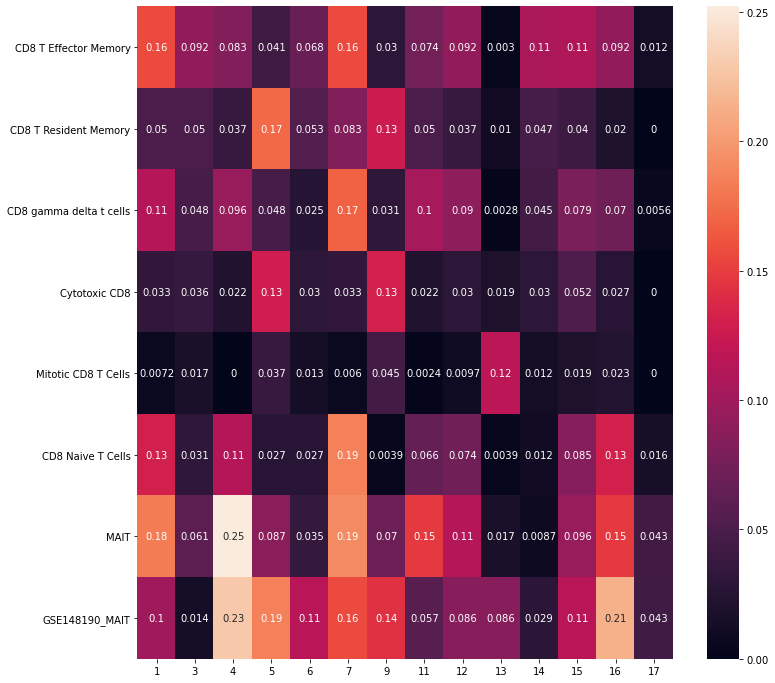

In [69]:
cell_annotation_norm = sc.tl.marker_gene_overlap(Mela, marker_genes, key='rank_genes_groups',normalize='reference')
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(cell_annotation_norm, cbar=True, annot=True,ax=ax)

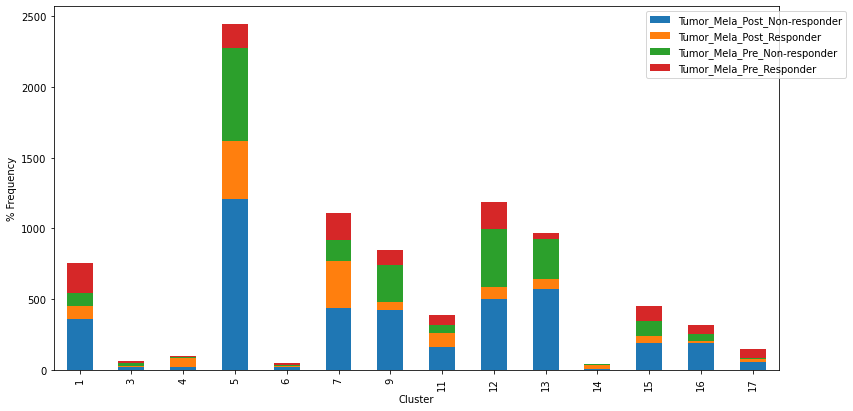

In [43]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = Mela.obs.groupby('desc_0.6')["TumorType"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

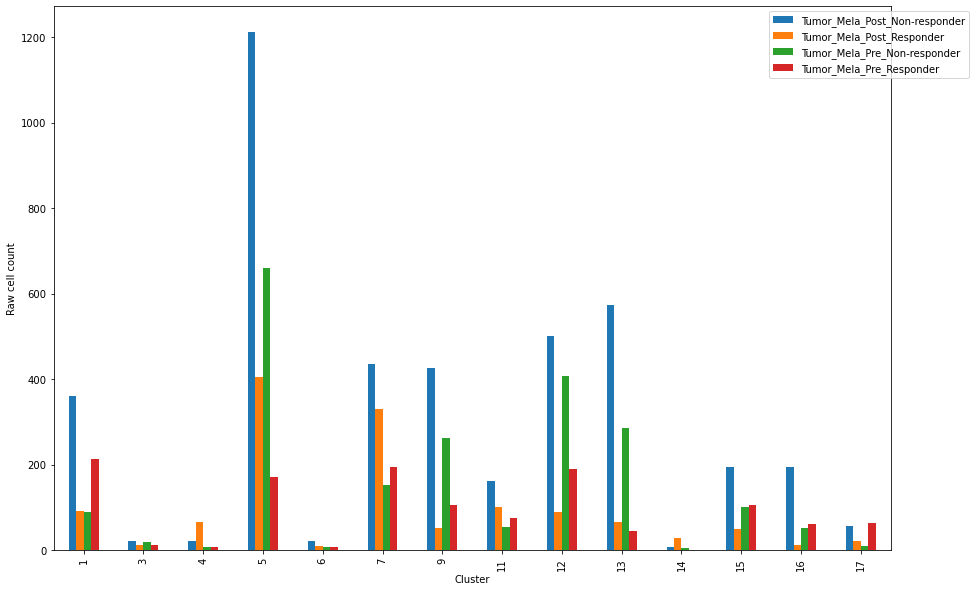

In [44]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,10))
#
ax1 = pd.crosstab(Mela.obs['desc_0.6'], adata.obs.TumorType).plot.bar(stacked=False,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Raw cell count")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

In [58]:
(pd.crosstab(Mela.obs["desc_0.6"], adata.obs.TumorType)*100).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check_Pre_Post_Resp_NoResp_NO_Normalized.csv",sep="\t",header=True)

In [56]:
(pd.crosstab(Mela.obs["desc_0.6"], adata.obs.TumorType,normalize='index')*100).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check_Pre_Post_Resp_NoResp_Normalized_by_row.csv",sep="\t",header=True)

In [57]:
(pd.crosstab(Mela.obs["desc_0.6"], adata.obs.TumorType,normalize='columns')*100).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check_Pre_Post_Resp_NoResp_Normalized_by_columns.csv",sep="\t",header=True)

In [59]:
pd.crosstab(Mela.obs["desc_0.6"], Mela.obs.PatientNumber,normalize=False).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check_Ptz_No_Normalization.csv",sep="\t",header=True)

In [70]:
(pd.crosstab(Mela.obs["desc_0.6"], Mela.obs.PatientNumber,normalize='index')*100).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check_Ptz_Normalized_by_row.csv",sep="\t",header=True)

In [71]:
(pd.crosstab(Mela.obs["desc_0.6"], Mela.obs.PatientNumber,normalize='columns')*100).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check_Ptz_Normalized_by_columns.csv",sep="\t",header=True)

In [72]:
Mela.write("/mnt/lugli/spuccio/SP028_Autoimmunity/SP028_Autoimmunity/MAIT_check/Melanome_MAIT_check.h5ad")